In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential  # similar to MLP
from tensorflow.keras.layers import Dense, Activation # Dense: Matrix calculation;Activation: relu, sigmoid and tanh
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam  # SGD

### Hyperparameter

In [2]:
batch_size = 128  # 128 data in one batch
num_classes = 10  # 10 classes
epochs = 10  # taining 10 times
hidden_units = 100 # num of hidden layers = nurons

learning_rate = 0.0001
clip_norm = 1.0  # upper limit of clip

### Load and process data

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # load data

x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255  # normalization: 0 ~ 255 -----> 0 ~ 1
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# 60000 samples, 28 time series, each series has 28 characteristics
# image, height: 28, width: 28
# 28 time series, each series has 28 data representing 28 pixels in each column
# if we use 60000 samples with 784 time series, each series is one pixel (bad)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [4]:
import matplotlib.pyplot as plt

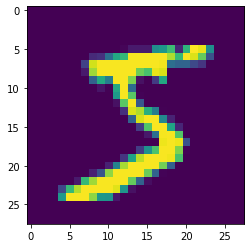

In [5]:
plt.imshow(x_train[0])

### target (one-hot)

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [7]:
# one-hot, Probability
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### SimpleRNN, fc = Dense and output layer (softmax)

In [8]:
# input.shape = [60000,784,1]

In [9]:
x_train.shape[1:]

(28, 28)

In [10]:
model = Sequential()
model.add(SimpleRNN(hidden_units, # num of hidden layers = nurons
                    kernel_initializer=initializers.RandomNormal(stddev=0.001),
                    recurrent_initializer=initializers.Identity(gain=1.0),
                    activation='relu',  # activation function
                    input_shape=x_train.shape[1:]))  # the shape of input data

model.add(Dense(num_classes))
model.add(Activation('softmax'))
opt = Adam(learning_rate = learning_rate)

# compile
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Training

In [11]:
model.fit(x_train, y_train,  # data and label
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,  # control output
          validation_data=(x_test, y_test))

# validation
scores = model.evaluate(x_test, y_test, verbose=0)
print('IRNN test score:', scores[0])
print('IRNN test accuracy:', scores[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/sample - loss: 1.1732 - accuracy: 0.6077 - val_loss: 0.7782 - val_accuracy: 0.7322
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.5753 - accuracy: 0.8115 - val_loss: 0.4883 - val_accuracy: 0.8350
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.4265 - accuracy: 0.8621 - val_loss: 0.3759 - val_accuracy: 0.8758
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3521 - accuracy: 0.8881 - val_loss: 0.3067 - val_accuracy: 0.8989
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3014 - accuracy: 0.9047 - val_loss: 0.2822 - val_accuracy: 0.9106
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2618 - accuracy: 0.9184 - val_loss: 0.2172 - val_accuracy: 0.9294
Epoch 7/10
60000/60000 [==============================]